In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split

In [93]:
X, y = load_data()
print(X.shape) # 5000 20*20 gray scale image
print(y.shape) # 5000 labels from 0 - 9

(5000, 400)
(5000, 1)


In [97]:
# Split dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
print(x_train.shape)
print(x_test.shape)

(4000, 400)
(1000, 400)


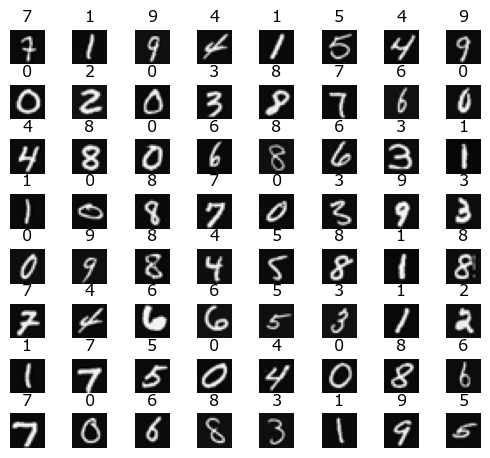

In [98]:
# Visualizing the data by selecting random images

m, n = X.shape
fig, axes = plt.subplots(8, 8, figsize = (5, 5)) # Create subplots
fig.tight_layout(pad=0.13, rect=[0, 0.03, 1, 0.91]) # Add paddings

for i, ax in enumerate(axes.flat):
    # Select random image X to show
    idx = np.random.randint(m)
    X_rand = X[idx].reshape((20, 20)).T
    ax.imshow(X_rand, cmap="gray")

    ax.set_title(y[idx, 0])
    ax.set_axis_off()

In [122]:
# Creating the Model
tf.random.set_seed(1234) # This is to create replicable results. 

model = Sequential()
model.add(tf.keras.Input(shape=(400,))) # Input is a 1D vector of size 400
model.add(tf.keras.layers.Dense(25, activation='relu'))
model.add(tf.keras.layers.Dense(15, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='linear'))

# > Note that the last layer has an activation function of "Linear"
# which is effectively no activation. 
# > We will then apply the Softmax function on the outputs later on.
# > This is to make the model more stable and reliable when 
# processing numerical operations. 

In [123]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 25)             │        10,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,575 (41.31 KB)

 Trainable params: 10,575 (41.31 KB)

 Non-trainable params: 0 (0.00 B)

In [124]:
# Define a loss function ...
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[keras.metrics.SparseCategoricalAccuracy()]
)

# ... and then train with data set
history = model.fit(x_train, y_train, epochs=40, validation_data=(x_test, y_test))

Epoch 1/40
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.9830 - sparse_categorical_accuracy: 0.2687 - val_loss: 0.9918 - val_sparse_categorical_accuracy: 0.7610
Epoch 2/40
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8669 - sparse_categorical_accuracy: 0.7838 - val_loss: 0.5626 - val_sparse_categorical_accuracy: 0.8480
Epoch 3/40
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5335 - sparse_categorical_accuracy: 0.8583 - val_loss: 0.4284 - val_sparse_categorical_accuracy: 0.8760
Epoch 4/40
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4078 - sparse_categorical_accuracy: 0.8851 - val_loss: 0.3696 - val_sparse_categorical_accuracy: 0.8900
Epoch 5/40
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3402 - sparse_categorical_accuracy: 0.9060 - val_loss: 0.3366 - val_sparse_categorical_accuracy: 0.9000
Epoch 6/40
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2963 - sparse_categorical_accuracy: 0.9187 - val_loss: 0.3160 - val_sparse_categorical_accuracy: 0.9040
Epoc

In [125]:
print(history.history.keys())

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


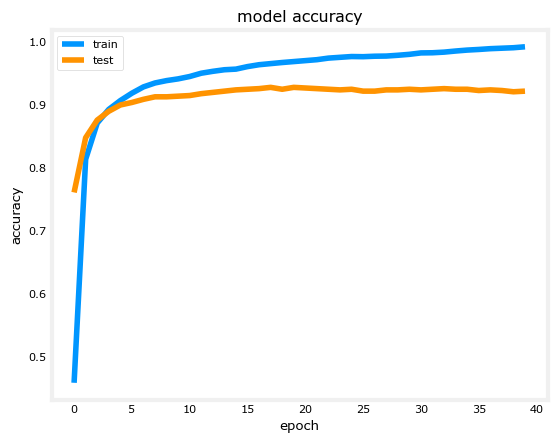

In [126]:
# Visualizing the model's accuracy
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

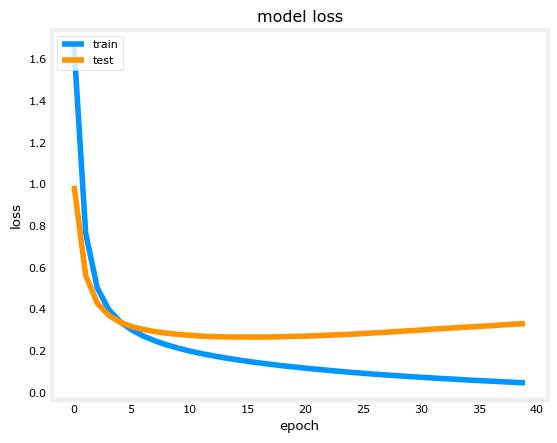

In [ ]:
# Visualizing the model's Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

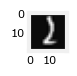

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[[-12.691489    2.3942761   6.7340565   4.2562447 -12.6732025  -4.8920984
   -9.868394    2.5990686  -5.0641513  -3.9206681]]
tf.Tensor(
[[3.2892316e-09 1.1715440e-02 8.9846528e-01 7.5405203e-02 3.3499308e-09
  8.0228074e-06 5.5353912e-08 1.4378014e-02 6.7546766e-06 2.1194024e-05]], shape=(1, 10), dtype=float32)
2


In [141]:
# Let's test a digit by hand
display_digit(X[1015]) # This is an image of the number '2'
pred = model.predict(X[1015].reshape(1, 400)) # Our model's predictions

print(pred)
# > The output is a 1D vector with 10 elements.

prob = tf.nn.softmax(pred)
print(prob)
# > The output is a Tensor with 10 elements 
# indicating the probability of the image. 

print(np.argmax(prob)) # Retrieves the index with largest value

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━

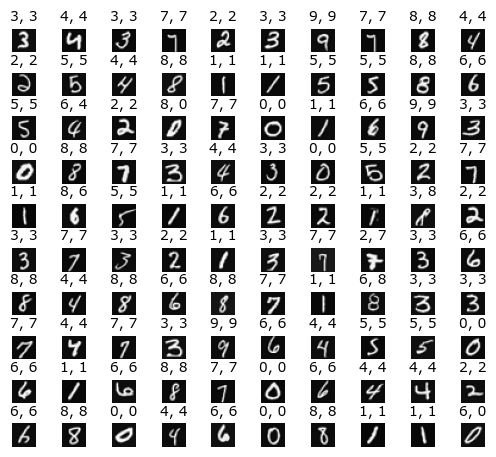

In [151]:
# Now lets try this on multiple images
fig, axes = plt.subplots(10, 10, figsize=(5, 5))
fig.tight_layout(pad=0.13, rect=[0, 0.03, 1, 0.91])

m, n = x_test.shape

for i, ax in enumerate(axes.flat):
    idx = np.random.randint(m)
    ax.imshow(x_test[idx].reshape(20, 20).T, cmap='gray')

    pred = model.predict(x_test[idx].reshape(1, 400))
    prob = tf.nn.softmax(pred)
    yhat = np.argmax(prob)

    ax.set_title(f"{yhat}, {y_test[idx, 0]}", fontsize=10)
    ax.set_axis_off()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
78


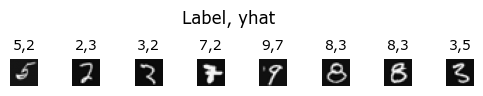

In [154]:
# Display wrong predictions
print(display_errors(model, x_test, y_test))

In [ ]:
# TODO: 
# Read functions in autils.py
# Delete unnecessary files